# Hospital Appointment No Show predication

In [2]:
import pandas as pd
import numpy as np
import datetime 
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('No Show.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Preprocessing

In [5]:
#Change ScheduledDay and AppointmentDay to date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [7]:
# Check The valuse in each column
print(df.Age.unique())
print(df.Gender.unique())
print(df.Scholarship.unique())
print(df.Hipertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.Handcap.unique())
print(df.SMS_received.unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]


In [8]:
#Check the number of patient with age = -1
df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
#only one patinet wiht age = 0 remove this record
df = df[df.Age >= 0]
df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
#Adding Waiting Time
# Check if there is minus cases on wating time calculation
((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0).unique()

array([False,  True])

In [11]:
#Assuming this error and will swich between the Scedule day  and appointment day 
df['AppointmentDay_New'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0
                                    , df['ScheduledDay'], df['AppointmentDay'])
df['ScheduledDay_New'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0
                                  ,df['AppointmentDay'], df['ScheduledDay'])

In [12]:
# Check if still there is minus cases on wating time calculation
((df['AppointmentDay_New'] - df['ScheduledDay_New']).dt.days < 0).unique()

array([False])

In [13]:
#Adding Waitng Days
df['Waiting_Days']= (df['AppointmentDay_New'] - df['ScheduledDay_New']).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDay_New,ScheduledDay_New,Waiting_Days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [14]:
#Adding Appointment & Schedule Week day,year,month and day
df['ScheduledDay_DOW'] = df['ScheduledDay_New'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay_New'].dt.day_name()

df['ScheduledDay_Y'] = df['ScheduledDay_New'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay_New'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay_New'].dt.day

df['AppointmentDay_Y'] = df['AppointmentDay_New'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay_New'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay_New'].dt.day
        
df.head()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_New,Waiting_Days,ScheduledDay_DOW,AppointmentDay_DOW,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,2016-04-29,0,Friday,Friday,2016,4,29,2016,4,29
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,2016-04-29,0,Friday,Friday,2016,4,29,2016,4,29
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,2016-04-29,0,Friday,Friday,2016,4,29,2016,4,29
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,2016-04-29,0,Friday,Friday,2016,4,29,2016,4,29
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,2016-04-29,0,Friday,Friday,2016,4,29,2016,4,29


In [15]:
#Remove Patient ID, Appointment ID  and Date columns to prepare the data for modeling 
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay','AppointmentDay_New','ScheduledDay_New']
        , axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_Days,ScheduledDay_DOW,AppointmentDay_DOW,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,Friday,2016,4,29,2016,4,29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,Friday,2016,4,29,2016,4,29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,Friday,2016,4,29,2016,4,29
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,Friday,2016,4,29,2016,4,29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,Friday,2016,4,29,2016,4,29


In [16]:
# Rename No-show coulmn to NoShow
df = df.rename(columns={'No-show': 'NoShow'})

## EDA

Count of NoShow and Show
NoShow
No     88207
Yes    22319
dtype: int64


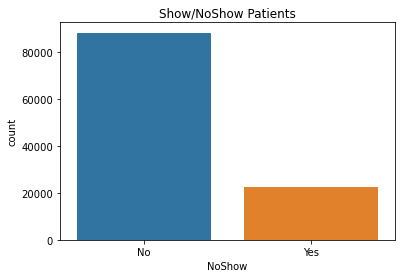

In [17]:
print("Count of NoShow and Show")
print(df.groupby(['NoShow']).size())
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

#### Below plot to Show the relation between the NoShow and: Hypertension, Diabitc, AppointmentDay_DOW, Waiting Days and Age

In [18]:
# Get Noshow casess only
df = df.rename(columns={'No-show': 'NoShow'})
NoSowCases = df[df.NoShow == 'Yes']

NoShow Count for Hypertension

Hipertension
0    18547
1     3772
dtype: int64


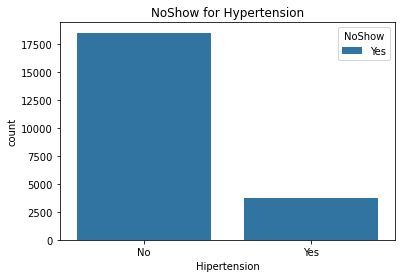

In [219]:
## Is the patient with chronic disease like hypertension and diabetic not attending their appointment?
#Count of NoShow Patients by Hypertension
print("NoShow Count for Hypertension\n")
print(NoSowCases.groupby(['Hipertension']).size())
#Visualization of NoShow Patients by Hypertension
ax = sns.countplot(x=NoSowCases.Hipertension, hue =NoSowCases.NoShow, data=NoSowCases)
ax.set_title("NoShow for Hypertension")
x_ticks_labels = ['No','Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

NoShow Count for Diabetic

Diabetes
0    20889
1     1430
dtype: int64


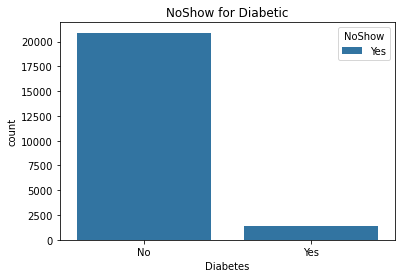

In [19]:
#Print count of NoShow Patients by Diabetic
print("NoShow Count for Diabetic\n")
print(NoSowCases.groupby(['Diabetes']).size())
#Visualization of NoShow Patients by Diabetic
ax = sns.countplot(x=NoSowCases.Diabetes, hue =NoSowCases.NoShow, data=NoSowCases)
ax.set_title("NoShow for Diabetic")
x_ticks_labels = ['No','Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

NoShow Count for Weekday

AppointmentDay_DOW
Friday       4037
Monday       4689
Saturday        9
Thursday     3338
Tuesday      5151
Wednesday    5095
dtype: int64


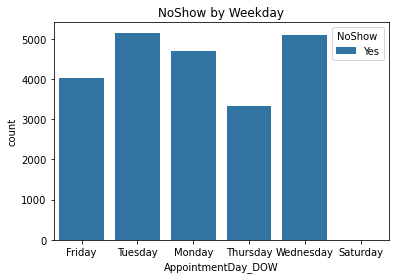

In [221]:
#Print count of NoShow Patients by day of the week
print("NoShow Count for Weekday\n")
print(NoSowCases.groupby(['AppointmentDay_DOW']).size())
#Visualization of NoShow Patients by Weekdat
ax = sns.countplot(x=NoSowCases.AppointmentDay_DOW, hue =NoSowCases.NoShow, data=NoSowCases)
ax.set_title("NoShow by Weekday")
#x_ticks_labels = ['No','Yes']
#ax.set_xticklabels(x_ticks_labels)
plt.show()

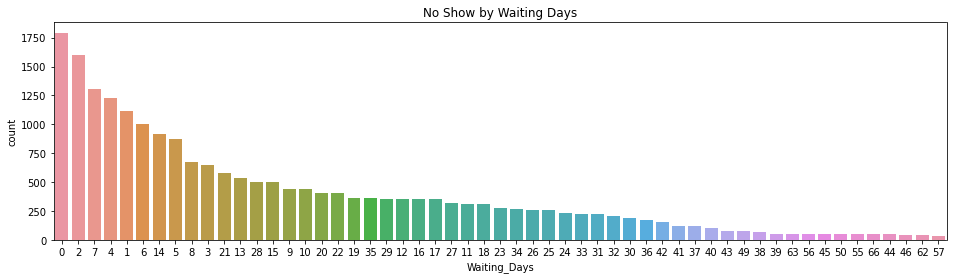

In [20]:
#Visualization of NoShow Patients by Waiting Days
plt.figure(figsize=(16,4))
ax = sns.countplot(x=NoSowCases.Waiting_Days, order=NoSowCases.Waiting_Days.value_counts().iloc[:55].index)
ax.set_title("No Show by Waiting Days")
plt.show()

# Modeling

In [21]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
#Neighbourhood
df['Neighbourhood'] = LabelEncoder().fit_transform(df['Neighbourhood'])
#AppointmentDay_DOW
df['AppointmentDay_DOW'] = LabelEncoder().fit_transform(df['AppointmentDay_DOW'])
#AppointmentDay_DOW
df['ScheduledDay_DOW'] = LabelEncoder().fit_transform(df['ScheduledDay_DOW'])
#NoShow
df['NoShow'] = LabelEncoder().fit_transform(df['NoShow'])
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,Waiting_Days,ScheduledDay_DOW,AppointmentDay_DOW,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,1,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
1,1,56,39,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
2,0,62,45,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
3,0,8,54,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
4,0,56,39,0,1,1,0,0,0,0,0,0,0,2016,4,29,2016,4,29


In [22]:
# split the dataset into features and Label
labels = df['NoShow']
features = df.drop('NoShow', axis = 1)
features = pd.DataFrame(data = features)

In [23]:
# Split the 'features' and 'Label' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [24]:
# apply features scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Data is imbalance first will build the model without balance

[[24697  1868]
 [ 5293  1300]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     26565
           1       0.41      0.20      0.27      6593

    accuracy                           0.78     33158
   macro avg       0.62      0.56      0.57     33158
weighted avg       0.74      0.78      0.75     33158

F1 Score: 0.2663661510091179
Precision: 0.41035353535353536
Recall: 0.19717882602760503


<AxesSubplot:>

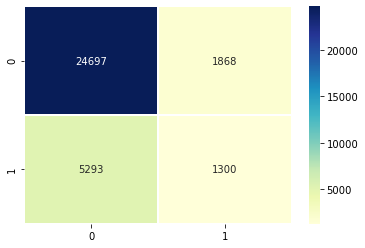

In [25]:
#Imbalance Dataset RandomForestClassifier
RF_Model = RandomForestClassifier(random_state=0)
#RandomForestClassifier(n_estimators=100, max_features=auto)
RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred) #confusion matrix to measure the accuracy of the test results 
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g') # plot confusion matrix using heatmap

[[21735  4830]
 [ 4335  2258]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     26565
           1       0.32      0.34      0.33      6593

    accuracy                           0.72     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.72      0.73     33158

F1 Score: 0.3300928294715299
Precision: 0.3185665914221219
Recall: 0.34248445320794785


<AxesSubplot:>

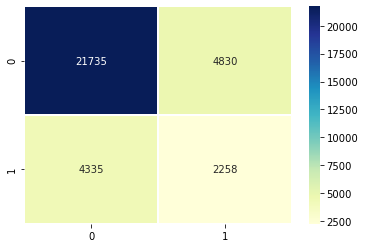

In [31]:
#Imbalance Dataset DecisionTreeClassifier
DC = DecisionTreeClassifier()
DC = DC.fit(X_train,y_train)
y_pred2 = DC.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("F1 Score:",f1_score(y_test, y_pred2))
print("Precision:",precision_score(y_test, y_pred2))
print("Recall:",recall_score(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2) #confusion matrix to measure the accuracy of the test results 
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g') # plot confusion matrix using heatmap

[[26294   271]
 [ 6461   132]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26565
           1       0.33      0.02      0.04      6593

    accuracy                           0.80     33158
   macro avg       0.57      0.50      0.46     33158
weighted avg       0.71      0.80      0.72     33158

F1 Score: 0.03773584905660377
Precision: 0.32754342431761785
Recall: 0.020021234642802973


<AxesSubplot:>

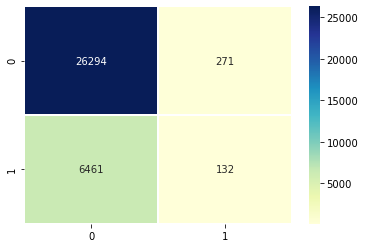

In [32]:
#Imbalance Dataset LogisticRegression
LR_Model =LogisticRegression(solver='liblinear')
LR_Model=LR_Model.fit(X_train, y_train) #train
y_pred3 = LR_Model.predict(X_test) #test
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("F1 Score:",f1_score(y_test, y_pred3))
print("Precision:",precision_score(y_test, y_pred3))
print("Recall:",recall_score(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3) #confusion matrix to measure the accuracy of the test results 
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g') # plot confusion matrix using heatmap

## Balance Data

In [34]:
#SMOTE oversampling technique.
from imblearn.over_sampling import SMOTE
smote = SMOTE( random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

[[22957  3608]
 [ 4511  2082]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     26565
           1       0.37      0.32      0.34      6593

    accuracy                           0.76     33158
   macro avg       0.60      0.59      0.59     33158
weighted avg       0.74      0.76      0.75     33158

F1 Score: 0.33900512904013674
Precision: 0.36590509666080845
Recall: 0.3157894736842105


<AxesSubplot:>

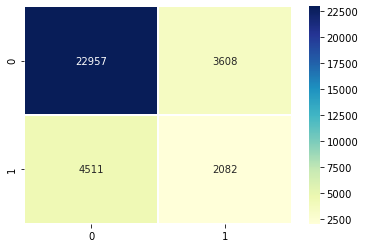

In [35]:
#Balanced Dataset RandomForestClassifier
RF_Model1 = RandomForestClassifier(random_state=0)
RF_Model1= RF_Model1.fit(X_train_smote, y_train_smote)
y_pred4 = RF_Model1.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print("F1 Score:",f1_score(y_test, y_pred4))
print("Precision:",precision_score(y_test, y_pred4))
print("Recall:",recall_score(y_test, y_pred4))
cm = confusion_matrix(y_test, y_pred4) #confusion matrix to measure the accuracy of the test results 
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g') # plot confusion matrix using heatmap

[[21160  5405]
 [ 4033  2560]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     26565
           1       0.32      0.39      0.35      6593

    accuracy                           0.72     33158
   macro avg       0.58      0.59      0.58     33158
weighted avg       0.74      0.72      0.73     33158

F1 Score: 0.3516966616293447
Precision: 0.3214061519146265
Recall: 0.3882906112543607


<AxesSubplot:>

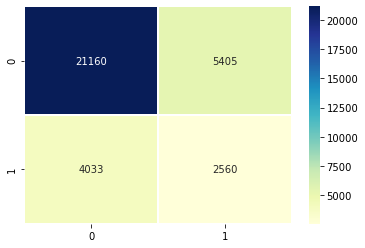

In [38]:
#Balanced Dataset DecisionTreeClassifier
DC1 = DecisionTreeClassifier()
DC1 = DC1.fit(X_train_smote,y_train_smote)
y_pred5 = DC1.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
print("F1 Score:",f1_score(y_test, y_pred5))
print("Precision:",precision_score(y_test, y_pred5))
print("Recall:",recall_score(y_test, y_pred5))
cm = confusion_matrix(y_test, y_pred5) #confusion matrix to measure the accuracy of the test results 
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g') # plot confusion matrix using heatmap

[[18322  8243]
 [ 2880  3713]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     26565
           1       0.31      0.56      0.40      6593

    accuracy                           0.66     33158
   macro avg       0.59      0.63      0.58     33158
weighted avg       0.75      0.66      0.69     33158

F1 Score: 0.4003450320772009
Precision: 0.31055536968885916
Recall: 0.5631730623388442


<AxesSubplot:>

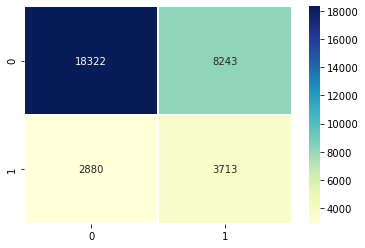

In [40]:
#balance Dataset LogisticRegression
LR_Model1 =LogisticRegression(solver='liblinear')
LR_Model1=LR_Model1.fit(X_train_smote,y_train_smote) 
y_pred6 = LR_Model1.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
cm = confusion_matrix(y_test, y_pred6) 
print(classification_report(y_test,y_pred6))
print("F1 Score:",f1_score(y_test, y_pred6))
print("Precision:",precision_score(y_test, y_pred6))
print("Recall:",recall_score(y_test, y_pred6))
cm = confusion_matrix(y_test, y_pred6) #confusion matrix to measure the accuracy of the test results 
sns.heatmap(cm, annot = True, linewidths=.5, cmap = "YlGnBu", fmt='g') # plot confusion matrix using heatmap